In [104]:
!pip install keras
!pip install tensorflow
!pip install pydot
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [105]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikeras




[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [106]:
# Required Libraries
import numpy as np
import pandas as pd

# Graph
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

# Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

# DL Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from keras.wrappers import SKLearnClassifier

import tensorflow as tf  # Add this line





In [107]:
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

In [108]:
# View  test label
print("Y Train Digit --->", y_train_digit)
print("=====")

print("Y Test Digit --->", y_test_digit)

Y Train Digit ---> [5 0 4 ... 5 6 8]
=====
Y Test Digit ---> [7 2 1 ... 4 5 6]


In [109]:
X_test_digit[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 116, 125, 171,
        255, 255, 150,  93,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253,
        253, 253, 253, 218,  30,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 169, 253, 253, 253, 213,
        142, 176, 253, 253, 122,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

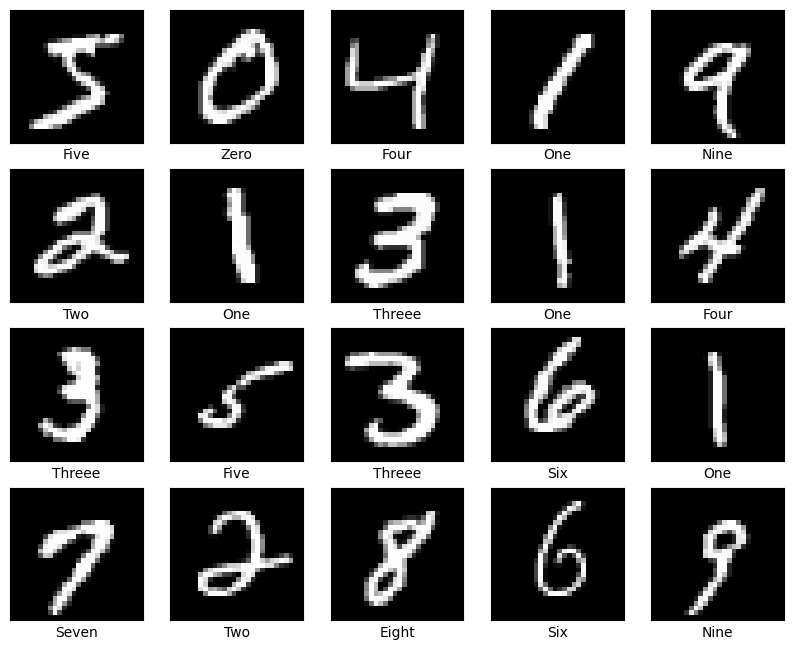

In [110]:
# Number as words  set in array 
col_names = ['Zero', 'One', 'Two', 'Threee',  'Four', 'Five', 'Six', 'Seven', 'Eight',  'Nine']

# Visualize the digits
plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]]) # Show mapped label for the y data


In [111]:
X_train_digit.shape

(60000, 28, 28)

In [112]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [113]:
# Preproccessing the input convertiong  3D to 2D

In [114]:
print(f"X_train_digit total elements: {X_train_digit.size}")
print(f"X_test_digit total elements: {X_test_digit.size}")

X_train_digit total elements: 47040000
X_test_digit total elements: 7840000


In [115]:
'''Based on  element counts,

 actual data dimensions:

X_train_digit: 47,040,000 elements
X_test_digit: 7,840,000 elements
calculate the correct shapes:

For X_train_digit: 47,040,000 ÷ 784 = 60,000 samples ✓ For X_test_digit: 7,840,000 ÷ 784 = 10,000 samples
'''

'Based on  element counts,\n\n actual data dimensions:\n\nX_train_digit: 47,040,000 elements\nX_test_digit: 7,840,000 elements\ncalculate the correct shapes:\n\nFor X_train_digit: 47,040,000 ÷ 784 = 60,000 samples ✓ For X_test_digit: 7,840,000 ÷ 784 = 10,000 samples\n'

In [116]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit  = X_test_digit.reshape(10000, 784)

In [117]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [118]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [119]:
!pip install keras
!pip install tensorflow


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [120]:
# Creating base neural network
model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    
    Dense(64, activation='relu'),
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    
    Dense(64, activation='relu'),
    
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    Dense(10, activation='sigmoid')

])

d:\DevOps\DL\Digits_ANN_Hands_on\venv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
# Test if everything imported correctly
print("All imports successful!")
print(f"TensorFlow version: {tf.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

All imports successful!
TensorFlow version: 2.19.0
Pandas version: 2.3.1
NumPy version: 2.1.3


In [122]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [123]:
''' Formula:
For a dense layer with:

input_units = number of input features (neurons from the previous layer)

output_units = number of output neurons in the current layer

Total parameters = (input_units × output_units) + output_units
'''

' Formula:\nFor a dense layer with:\n\ninput_units = number of input features (neurons from the previous layer)\n\noutput_units = number of output neurons in the current layer\n\nTotal parameters = (input_units × output_units) + output_units\n'

In [125]:
#Compiling the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics= ['accuracy'])

# adam = Adaptive Movement Estimation

In [126]:
history = model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10, validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5749 - loss: 4.6926 - val_accuracy: 0.7316 - val_loss: 0.3613
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7671 - loss: 0.2977 - val_accuracy: 0.8084 - val_loss: 0.2855
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7986 - loss: 0.2075 - val_accuracy: 0.7806 - val_loss: 0.2110
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8009 - loss: 0.1602 - val_accuracy: 0.8343 - val_loss: 0.2135
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8117 - loss: 0.1343 - val_accuracy: 0.7710 - val_loss: 0.1817
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7895 - loss: 0.1104 - val_accuracy: 0.7832 - val_loss: 0.1630
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7700 - loss: 0.0956 - val_accuracy: 0.7645 - val_loss: 0.1668
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7691 - loss: 0.0981 - val_accuracy: 0.

In [127]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7625 - loss: 0.1798


In [128]:
print("Digit MNIST Test accuracy:", round(test_acc_digit, 4))

Digit MNIST Test accuracy: 0.7531


In [129]:
# Predicting the lables-Digit
y_predict = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [130]:
y_predict[0]

array([9.3071967e-02, 9.9450916e-01, 9.1877675e-01, 9.9600714e-01,
       9.2936367e-01, 1.9098915e-03, 4.3960961e-05, 1.0000000e+00,
       4.5264867e-01, 9.9995548e-01], dtype=float32)

In [132]:
y_predicts = np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval = np.argmax(y_test_digit, axis=1)

In [133]:
y_predicts[0]

np.int64(7)

In [134]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

In [135]:
y_pre=pd.DataFrame(y_predicts)

In [136]:
y_pre


,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,1


In [137]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


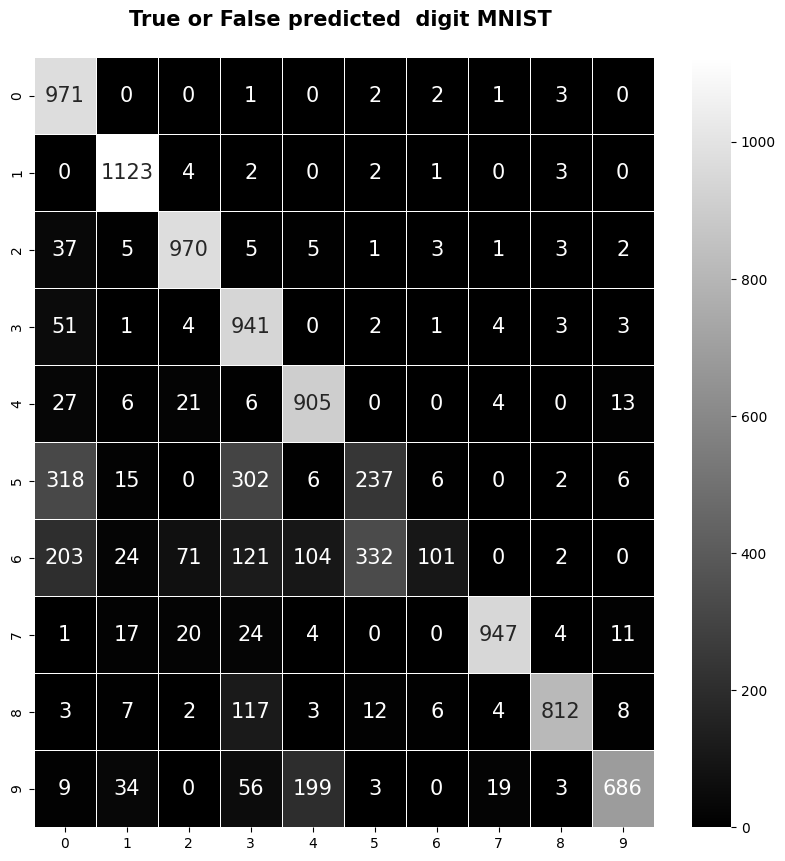

In [138]:
# Confusion matrix
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))

sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
plt.title("True or False predicted  digit MNIST \n", fontweight='bold', fontsize=15)
plt.show()

In [139]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval, y_predicts))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       980
           1       0.91      0.99      0.95      1135
           2       0.89      0.94      0.91      1032
           3       0.60      0.93      0.73      1010
           4       0.74      0.92      0.82       982
           5       0.40      0.27      0.32       892
           6       0.84      0.11      0.19       958
           7       0.97      0.92      0.94      1028
           8       0.97      0.83      0.90       974
           9       0.94      0.68      0.79      1009

    accuracy                           0.77     10000
   macro avg       0.79      0.76      0.73     10000
weighted avg       0.79      0.77      0.74     10000



In [140]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


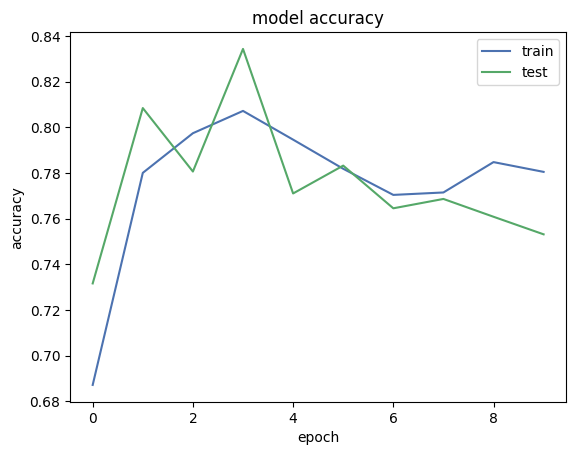

In [142]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

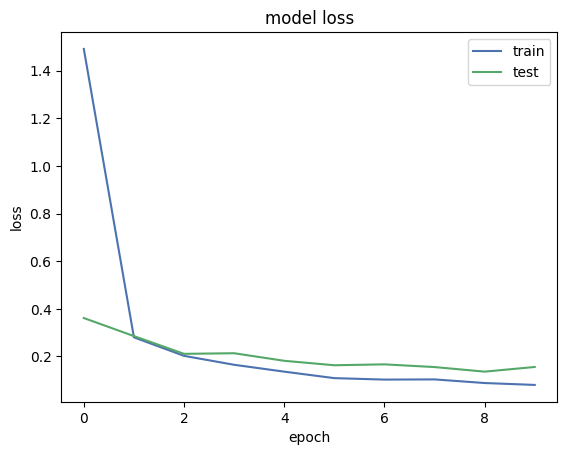

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [144]:
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [145]:
y_predicts_single[0]

np.int64(1)

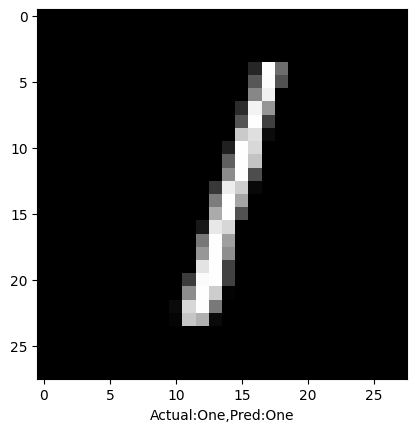

In [146]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [147]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])